In [1]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

!wget -O selected.zip https://www.dropbox.com/s/ow1delunc6sb5if/selected.zip?dl=1
!unzip selected.zip

Fatal Python error: initsite: Failed to import the site module
Traceback (most recent call last):
  File "/usr/lib/python3.7/site.py", line 596, in <module>
  File "/usr/lib/python3.7/site.py", line 583, in main
    known_paths = addsitepackages(known_paths)
  File "/usr/lib/python3.7/site.py", line 366, in addsitepackages
    addsitedir(sitedir, known_paths)
  File "/usr/lib/python3.7/site.py", line 213, in addsitedir
    addpackage(sitedir, name, known_paths)
  File "/usr/lib/python3.7/site.py", line 174, in addpackage
    exec(line)
  File "<string>", line 1, in <module>
  File "<frozen importlib._bootstrap_external>", line 1280, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1252, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1379, in find_spec
  File "<frozen importlib._bootstrap_external>", line 59, in _path_join
KeyboardInterrupt
--2022-04-25 12:28:48--  https://www.dropbox.com/s/ow1delunc6sb5if/selected.zip?dl=1
Resolving www.dropbox.com

In [2]:
import numpy as np
import cv2 as cv
from scipy.spatial import KDTree
import random
from matplotlib import pyplot as plt
import glob
from PIL import Image

In [9]:
fns = sorted(glob.glob("selected/*"))
print(fns)
img = []
kp, des = [], []
dim = (795, 530)
for fn in fns:
  tmp = cv.resize(cv.imread(fn), (dim[1], dim[0]))
  img.append(tmp)
  gray = cv.cvtColor(tmp, cv.COLOR_BGR2GRAY)
  sift = cv.xfeatures2d.SIFT_create()
  k, d = sift.detectAndCompute(gray, None)
  kp.append(k)
  des.append( np.array(d) )
  print( fn, "keypoint num:", len(k))
img = np.array(img)

['selected/DSC02959.JPG', 'selected/DSC02960.JPG', 'selected/DSC02961.JPG', 'selected/DSC02962.JPG', 'selected/DSC02963.JPG', 'selected/DSC02964.JPG', 'selected/DSC02965.JPG', 'selected/DSC02966.JPG', 'selected/DSC02967.JPG', 'selected/DSC02969.JPG', 'selected/DSC02970.JPG', 'selected/DSC02971.JPG', 'selected/DSC02972.JPG', 'selected/DSC02973.JPG', 'selected/DSC02974.JPG', 'selected/DSC02975.JPG', 'selected/DSC02976.JPG']
selected/DSC02959.JPG keypoint num: 2085
selected/DSC02960.JPG keypoint num: 1880
selected/DSC02961.JPG keypoint num: 1756
selected/DSC02962.JPG keypoint num: 1683
selected/DSC02963.JPG keypoint num: 1553
selected/DSC02964.JPG keypoint num: 1361
selected/DSC02965.JPG keypoint num: 1452
selected/DSC02966.JPG keypoint num: 1452
selected/DSC02967.JPG keypoint num: 1419
selected/DSC02969.JPG keypoint num: 1370
selected/DSC02970.JPG keypoint num: 1180
selected/DSC02971.JPG keypoint num: 1126
selected/DSC02972.JPG keypoint num: 1112
selected/DSC02973.JPG keypoint num: 1356


True

In [4]:

# img, gray, kp, des = [0] * 2, [0] * 2, [0] * 2, [0] * 2

# img[0] = cv.imread('selected/DSC02974.JPG')
# img[1] = cv.imread('selected/DSC02975.JPG')
# dim = (795, 530)

# for i in (0,1):
#   img[i] = cv.resize(img[i], (dim[1], dim[0]))
#   gray[i] = cv.cvtColor(img[i], cv.COLOR_BGR2GRAY)

#   sift = cv.xfeatures2d.SIFT_create()
#   kp[i], des[i] = sift.detectAndCompute(gray[i], None)
#   des[i] = np.array(des[i])
#   print("num of keypoints", len(kp[i]))

#   # img[i] = cv.drawKeypoints(gray[i], kp[i], img[i], flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#   # cv.imwrite('sift_keypoints'+ str(i) +'.jpg', img[i])


In [10]:
def match_feat(kp, des):
  tree = [KDTree(des[0]), KDTree(des[1])]
  match = [[], []]
  
  for point in des[1]:
    dist0, ind0 = tree[0].query(point, k=1)
    dist1, ind1 = tree[1].query(des[0][ind0], k=1)
    if des[1][ind1][0] == point[0] and des[1][ind1][1] == point[1]:
      match[0].append( kp[0][ind0].pt )
      match[1].append( kp[1][ind1].pt )
  print(len(match[1]))
  # for i in (0,1):
  #   cv.drawKeypoints(img[i], match[i], img[i])
  #   cv.imwrite('sift_keypoints'+ str(i) +'.jpg', img[i])
  return np.array(match[0]), np.array(match[1])

p1, p2 = match_feat(kp[15:17], des[15:17])

# test = [random.random()*100 for x in range(128)]
# print(test)
# dist, ind = tree.query(test, k=5)



627


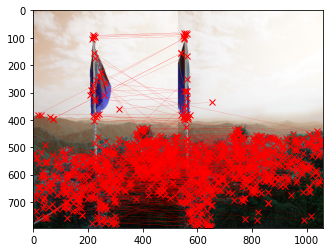

In [11]:
def plot_matches(p1, p2, total_img):
    match_img = total_img.copy()
    offset = total_img.shape[1]/2
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(match_img).astype('uint8')) #　RGB is integer type
    
    ax.plot(p1[:, 0], p1[:, 1], 'xr')
    ax.plot(p2[:, 0] + offset, p2[:, 1], 'xr')
     
    ax.plot([p1[:, 0], p2[:, 0] + offset], [p1[:, 1], p2[:, 1]],
            'r', linewidth=0.1)

    plt.show()

total_img = np.concatenate((img[15], img[16]), axis=1)
plot_matches(p1, p2, total_img)

Inliers / Total pairs: 181 / 627 ( 0.2886762360446571 )
[181, 180, 180, 176, 174, 173, 171, 170, 170, 169, 169, 168, 167, 166, 164, 162, 161, 157, 148, 147, 146, 144, 142, 137, 134, 131, 128, 124, 122, 121, 111, 111, 108, 107, 102, 99, 99, 95, 93, 91, 89, 88, 85, 81, 73, 72, 65, 63, 61, 60, 56, 52, 50, 49, 48, 48, 47, 46, 46, 43, 43, 43, 42, 42, 42, 41, 41, 41, 40, 39, 39, 37, 37, 35, 35, 35, 34, 34, 33, 33, 32, 32, 32, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 26, 26, 26, 25, 25, 25, 24, 24, 23, 23, 23, 22, 22, 22, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 

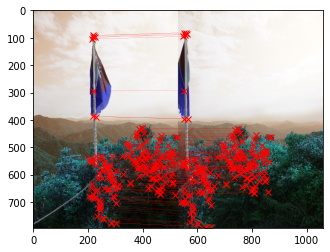

In [45]:
def homography(p1, p2):
  rows = []
  for a, b in zip(p1, p2):
    row1 = [0, 0, 0, b[0], b[1], 1, -a[1]*b[0], -a[1]*b[1], -a[1]]
    row2 = [b[0], b[1], 1, 0, 0, 0, -a[0]*b[0], -a[0]*b[1], -a[0]]
    rows.append(row1)
    rows.append(row2)
  rows = np.array(rows)
  U, s, V = np.linalg.svd(rows)
  H = V[-1].reshape(3, 3)
  H = H/H[2, 2] # standardize to let w*H[2,2] = 1
  return H

def ransac(p1, p2, thresh = 10, k = 4, iter = 5000):
  max_match = 0
  all_match = []
  best_match_pairs = [[], []]
  best_H = None
  for i in range(iter):
    match = 0
    match_pairs = [[],[]]
    sam = random.sample( range(p2.shape[0]), k )
    H = homography( p1[sam], p2[sam] )

    # check rank 
    if np.linalg.matrix_rank(H) < 3:
      continue
    for i in range(p2.shape[0]):
      p = np.append(p2[i], 1)
      pred = np.dot(H, p)
      pred = np.array( [ pred[0]/pred[2], pred[1]/pred[2] ])
      if np.linalg.norm(pred - p1[i], ord = 2) < thresh:
        match += 1
        match_pairs[0].append(p1[i])
        match_pairs[1].append(p2[i])
    all_match.append(match)
    if match > max_match:
      max_match = match
      best_match_pairs = match_pairs
      best_H = H.copy()
    
  print("Inliers / Total pairs:", max_match, "/", p2.shape[0], "(", max_match/p2.shape[0], ")")
  print(sorted(all_match, reverse=True))
  return best_H, np.array(best_match_pairs)

H, pairs = ransac(p1, p2)

total_img = np.concatenate((img[15], img[16]), axis=1)
plot_matches(pairs[0], pairs[1], total_img)

[[  0   0 530 530]
 [  0 795   0 795]
 [  1   1   1   1]]
[[196  15]
 [190 766]
 [765 -33]
 [749 837]]
(33, 530, 3) (42, 530, 3)
[[  0. -33.]
 [795. 837.]]
(870, 795, 3)


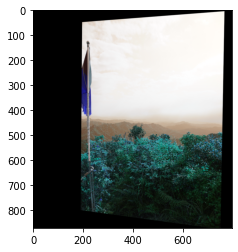

In [46]:
def stitch_img(img1, img2, H):
  # stitch img2 to img1
  # img1 = cv.normalize(img1.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
  # img2 = cv.normalize(img2.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
  corners = np.array([[0, 0, 1], [0, img2.shape[0], 1], [img2.shape[1], 0, 1], [img2.shape[1], img2.shape[0], 1]]).T
  print(corners)
  # find corners of the warped image
  mapped_corners = np.dot(H, corners)
  mapped_corners = mapped_corners / mapped_corners[2, :]
  mapped_corners = mapped_corners[:-1, :].T.astype("int32")
  print(mapped_corners)

  # shift the warpped image downwards if the transformed y coordinate is a negative value
  min_v = min(0, min(mapped_corners[:,1]))
  H[1, 2] += abs(min_v)

  # shift the base image downwards if the transformed y coordinate is a negative value
  top_pad = np.zeros( (-1 * min(0, min(mapped_corners[:,1])), img1.shape[1], 3 ) )
  bot_pad = np.zeros( (max(0, max(mapped_corners[:,1]) - img1.shape[0]), img1.shape[1], 3 ) )
  print(top_pad.shape, bot_pad.shape)
  warp1 = np.concatenate( (top_pad, img1, bot_pad), axis=0 )
  cv.imwrite('warp1.jpg', np.array(warp1))

  new_corners = np.zeros( (2,2) )
  new_corners[0] = np.array( [ min( 0, min(mapped_corners[:, 0])), min( 0, min(mapped_corners[:, 1])) ] )
  new_corners[1] = np.array( [ max( img1.shape[0], max(mapped_corners[:, 0])), max( img1.shape[1], max(mapped_corners[:, 1])) ] )
  print(new_corners)

  w, h = round( new_corners[1][0] - new_corners[0][0] ), round( new_corners[1][1] - new_corners[0][1] )
  
  warped = cv.warpPerspective(src = img2, M = H, dsize = ( w, h ) )
  print(warped.shape)
  fig, ax = plt.subplots()
  ax.imshow(np.array(warped).astype('uint8'))
  # ax.imshow(np.array(img1).astype('uint8'))
  
  cv.imwrite('warp.jpg', np.array(warped))

stitch_img(img[15], img[16], H)